In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, MobileNetV2

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout 
from tensorflow.keras.regularizers import l2


from tensorflow.keras import layers
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [4]:
# Veri yüklemesi ve artırması
base_dir = "C://..//..//..//..//..//..//..//.."
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)


seed_value = 224

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical',
    subset='training',
    shuffle=False,
    seed=seed_value
)

validation_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical',
    subset='validation',
    shuffle=False,  # Doğrulama setini karıştırma
    seed=seed_value
)





Found 984 images belonging to 10 classes.
Found 416 images belonging to 10 classes.


In [5]:
# MobileNetV2 modelini yükleme
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Yeni bir model oluşturma
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Dropout ekledik

predictions = layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Base model katmanlarını dondurma
for layer in base_model.layers:
    layer.trainable = False

# Modeli derleme
optimizer = RMSprop(learning_rate=0.007)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping callback'i ekleme
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model özetini gösterme
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [6]:
model.compile(
    optimizer=RMSprop(0.0007),    # Adam optimizer ve learning rate ayarı
    loss='categorical_crossentropy',  # Kategorik çapraz entropi kaybı
    metrics=['accuracy']            # Başarı metriği
)


In [7]:
history = model.fit(
    train_generator,
    epochs=75,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

C:\Users\Fatma\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/75
246/246 ━━━━━━━━━━━━━━━━━━━━ 278s 839ms/step - accuracy: 0.1666 - loss: 3.0702 - val_accuracy: 0.2740 - val_loss: 1.8911
Epoch 2/75
246/246 ━━━━━━━━━━━━━━━━━━━━ 92s 374ms/step - accuracy: 0.2861 - loss: 2.0533 - val_accuracy: 0.4856 - val_loss: 1.4608
Epoch 3/75
246/246 ━━━━━━━━━━━━━━━━━━━━ 90s 364ms/step - accuracy: 0.4548 - loss: 1.5436 - val_accuracy: 0.5601 - val_loss: 1.3006
Epoch 4/75
246/246 ━━━━━━━━━━━━━━━━━━━━ 142s 365ms/step - accuracy: 0.5280 - loss: 1.4262 - val_accuracy: 0.6394 - val_loss: 1.1749
Epoch 5/75
246/246 ━━━━━━━━━━━━━━━━━━━━ 96s 388ms/step - accuracy: 0.5365 - loss: 1.3239 - val_accuracy: 0.6562 - val_loss: 1.1280
Epoch 6/75
246/246 ━━━━━━━━━━━━━━━━━━━━ 89s 358ms/step - accuracy: 0.6109 - loss: 1.2336 - val_accuracy: 0.7067 - val_loss: 1.0427
Epoch 7/75
246/246 ━━━━━━━━━━━━━━━━━━━━ 84s 341ms/step - accuracy: 0.6053 - loss: 1.1899 - val_accuracy: 0.6659 - val_loss: 1.0499
Epoch 8/75
246/246 ━━━━━━━━━━━━━━━━━━━━ 93s 375ms/step - accuracy: 0.6800 - loss:

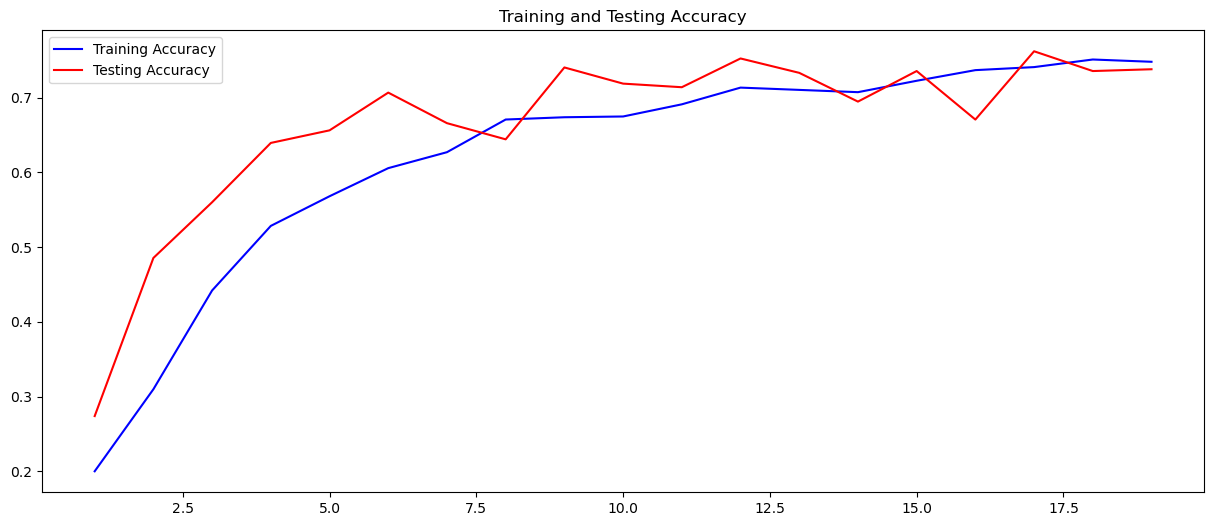

In [8]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
acc_loss=history.history["loss"]
val_loss=history.history["val_loss"]
epoch=range(1,len(acc)+1)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(epoch,acc,label=("Training Accuracy"),color="b")
plt.plot(epoch,val_acc,label=("Testing Accuracy"),color="r")
plt.title("Training and Testing Accuracy")
plt.legend()

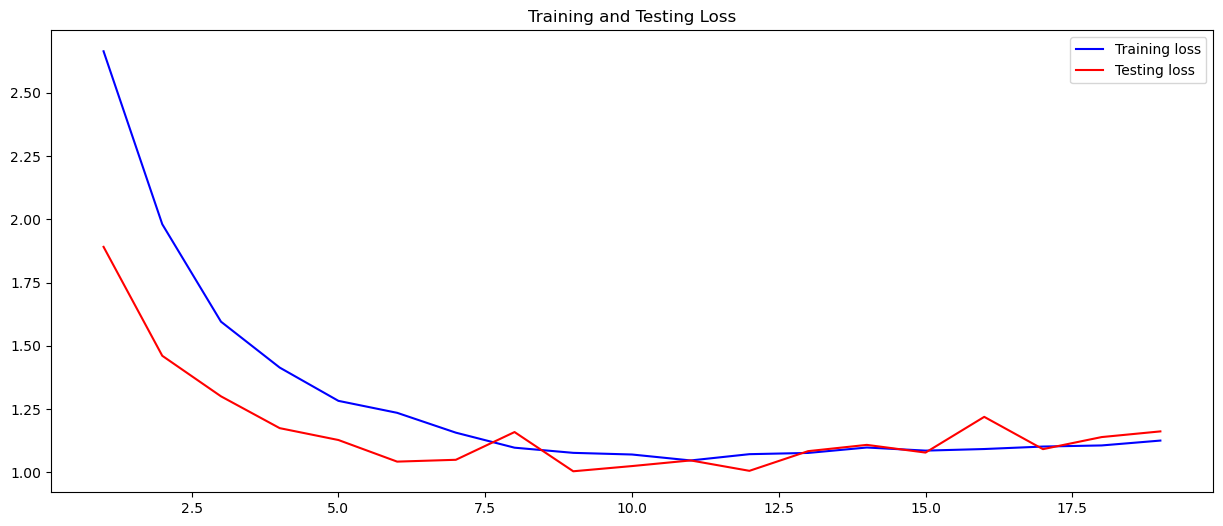

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(epoch,acc_loss,label=("Training loss"),color="b")
plt.plot(epoch,val_loss,label=("Testing loss"),color="r")
plt.title("Training and Testing Loss")
plt.legend()